Dataset From https://github.com/imRishabhGupta/Indian-Sign-Language-Recognition and modified by Sujay P using script from the linked project

Author of this Code : Sujay P

This project was created and trained on google colab with dataset uploaded on google drive

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
# installing tensorflow 2.1.0 to avoid issues while training with the beta/alpha versions ending with rc1 or something similar
# if the version does not contain rc, no need to install
#pip install tensorflow==2.1.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# training set path
# upload your dataset to a folder in google drive and put the folder name after My Drive/
# in the side menu of this colab file click on the folder icon and press on mount drive(folder icon with gdrive logo)
train_path = 'drive/My Drive/SLR_data/new_bw_black/'

In [ ]:
# if you want to check if its proper
# put the subfolder-name/filename.filetype in place of A/1.jpg
sample_A = train_path+'A/1.jpg'

In [ ]:
# using matplotlib.pyplot to read the file as a numpy array
plt.imread(sample_A)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# shape is (rows, columns)
# keep the dimensions somewhat around these dimensions, less or equal dont use big images
# calculate the aspect ratio by columns / rows and resize it to dimensions which are both integers
plt.imread(sample_A).shape

(96, 128)

In [ ]:
import os

In [ ]:
os.listdir(train_path+'A')

['1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '50.jpg',
 '51.jpg',
 '52.jpg',
 '53.jpg',
 '54.jpg',
 '55.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '60.jpg',
 '61.jpg',
 '62.jpg',
 '63.jpg',
 '64.jpg',
 '65.jpg',
 '66.jpg',
 '67.jpg',
 '68.jpg',
 '69.jpg',
 '70.jpg',
 '71.jpg',
 '72.jpg',
 '73.jpg',
 '74.jpg',
 '75.jpg',
 '76.jpg',
 '77.jpg',
 '78.jpg',
 '79.jpg',
 '80.jpg',
 '81.jpg',
 '82.jpg',
 '83.jpg',
 '84.jpg',
 '85.jpg',
 '86.jpg',
 '87.jpg',
 '88.jpg',
 '89.jpg',
 '90.jpg',
 '91.jpg',
 '92.jpg

In [ ]:
len(os.listdir(train_path+'A'))

241

In [ ]:
import imutils

In [ ]:
# resizing the images and storing and appending them to dim1 and dim2 and later calculating mean to check if any 
# dimension is different, no need to run anymore
'''
dim1 = []
dim2 = []

for image in os.listdir(train_path+'A'):
    img = plt.imread(train_path+'A/'+image)
    img_resized = imutils.resize(img, height = 100)
    d1, d2, colors = img_resized.shape
    dim1.append(d1)
    dim2.append(d2)
'''

"\ndim1 = []\ndim2 = []\n\nfor image in os.listdir(train_path+'A'):\n    img = plt.imread(train_path+'A/'+image)\n    img_resized = imutils.resize(img, height = 100)\n    d1, d2, colors = img_resized.shape\n    dim1.append(d1)\n    dim2.append(d2)\n"

In [ ]:
#dim1

In [ ]:
#dim2

In [ ]:
# if the mean is equal to first dimension then that means all the images have been succesfully transformed into same first dimension
# you can use the unique function as well
#np.mean(dim1)

In [ ]:
# similar to above cell
#np.mean(dim2)

In [ ]:
# target image shape
# the third dimension is the number of color channels. I converted my dataset to grayscale. If your dataset contains only color images then
# third dimension will be 3 instead of 1
image_shape = (96, 128, 1)

In [ ]:
# ImageDataGenerator to apply augmentations to the image while training the model thus increasing the data set size
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# run this cell and the following three cells to see the change then run these four again and then feel free to change the values of this cell and
# run these four again
# rescale is used to normalize every image to bring range of every pixel in between 0 & 1
image_gen = ImageDataGenerator(rotation_range = 20,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               shear_range = 0.1,
                               zoom_range = 0.1,
                               horizontal_flip = False,
                               fill_mode = 'nearest',
                               validation_split = 0.2,
                               rescale = 1.0/255)

In [ ]:
sample_A_read = plt.imread(sample_A)
sample_A_read.shape

(96, 128)

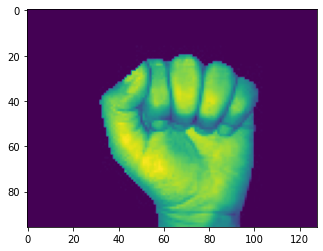

In [ ]:
# Original image from the dataset
plt.imshow(sample_A_read)

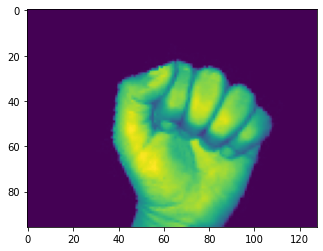

In [ ]:
# Augmentd image created from the above image using ImageDataGenerator
# run this cell again and again to see random changes
sample_A_exp = np.expand_dims(sample_A_read, 2)
sample_A_exp.shape
plt.imshow(image_gen.random_transform(sample_A_exp).reshape(96, 128))

In [ ]:
image_gen.flow_from_directory(train_path)

Found 4968 images belonging to 24 classes.


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
# Convolutional Neural Network (CNN) model
model = Sequential()                    # initialize the model

# following are the layers
# try training with these same configurations first then add more layers, layer combos and run this cell again and then train
# you can add multiple Conv2D layers before a MaxPool2D layer or you can use the same alternate combo i have used
# dont use 2 MaxPool2D layers one after the other immediately
# you can change the filters argument in the existing Conv2D layers or the new layers you add but keeping the other arguments same is recommended
# dont add Conv2D and MaxPool2D layers after the Flatten layer

model.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4, 4), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

#model.add(Conv2D(filters = 64, kernel_size = (4, 4), input_shape = image_shape, activation = 'relu'))
#model.add(MaxPool2D(pool_size = (2,2)))

# dont add any Conv2D or MaxPool2D layers after this
model.add(Flatten())

# Dense layers are regular neural network layers
# the first argument of Dense is the number of neurons you want in the current layer
model.add(Dense(128, activation = 'relu'))

# feel free to add more Dense layers before the following final layer
# The following is the final layer of the model
# The number of neurons in this layer must be equal to the number of classes you want to classify the input image into
# !!! Exception !!! If your model has to classify into two classes only then the number of neurons should be 1 and
# the activation should be 'sigmoid' 
model.add(Dense(24, activation = 'softmax'))

# Now compiling the model
# If your model has to classify into two classes only then the loss argument should be 'binary_crossentropy'
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# EarlyStopping monitors 'val_loss' i.e. validation test loss and as soon as the 'val_loss' starts increasing instead of decreasing it
# it stops
# patience = 5 means it will wait for 5 epochs(itterations) before stopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)

In [ ]:
batch_size = 16

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size = image_shape[:2],
                                               color_mode = 'grayscale',
                                               batch_size = batch_size,
                                               class_mode = 'categorical',
                                                subset = 'training')

Found 3983 images belonging to 24 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size = image_shape[:2],
                                               color_mode = 'grayscale',
                                               batch_size = batch_size,
                                               class_mode = 'categorical',
                                                subset = 'validation')

Found 985 images belonging to 24 classes.


In [ ]:
train_image_gen.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'O': 13,
 'P': 14,
 'Q': 15,
 'R': 16,
 'S': 17,
 'T': 18,
 'U': 19,
 'V': 20,
 'W': 21,
 'X': 22,
 'Y': 23}

In [ ]:
test_image_gen.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'O': 13,
 'P': 14,
 'Q': 15,
 'R': 16,
 'S': 17,
 'T': 18,
 'U': 19,
 'V': 20,
 'W': 21,
 'X': 22,
 'Y': 23}

In [ ]:
# Training The Model
# validation data is the predictions on validation set on which it calculates validation loss and accuracy
# EarlyStopping can monitor validation loss(monitors a decrease until increase[which means the model has started to overfit on the training set]) or
# validation accuracy (monitors an increase until a decrease)
results = model.fit_generator(train_image_gen, epochs = 30,
                             validation_data = test_image_gen,
                             callbacks = [early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
249/249 [==============================] - 2755s 11s/step - loss: 1.7676 - accuracy: 0.4665 - val_loss: 1.6408 - val_accuracy: 0.5553
Epoch 2/30
249/249 [==============================] - 102s 408ms/step - loss: 0.8224 - accuracy: 0.7432 - val_loss: 1.0662 - val_accuracy: 0.7279
Epoch 3/30
249/249 [==============================] - 94s 377ms/step - loss: 0.5335 - accuracy: 0.8250 - val_loss: 0.8124 - val_accuracy: 0.7706
Epoch 4/30
249/249 [==============================] - 94s 378ms/step - loss: 0.3767 - accuracy: 0.8835 - val_loss: 0.7511 - val_accuracy: 0.8122
Epoch 5/30
249/249 [==============================] - 95s 381ms/step - loss: 0.3277 - accuracy: 0.8966 - val_loss: 0.6557 - val_accuracy: 0.8305
Epoch 6/30
249/249 [==============================] - 92s 370ms/step - loss: 0.2624 - accuracy: 0.9146 - val_loss: 0.6422 - val_accuracy: 0.8355
Epoch 7/30
249/249 [==============================] -

In [ ]:
results

In [ ]:
# converting the results of the trainig to a pandas dataframe
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.767598,0.466483,1.640850,0.555330
1,0.822356,0.743158,1.066197,0.727919
2,0.533501,0.825006,0.812415,0.770558
3,0.376656,0.883505,0.751095,0.812183
4,0.327735,0.896560,0.655693,0.830457
5,0.262432,0.914637,0.642150,0.835533
6,0.250959,0.925433,0.538047,0.861929
7,0.176420,0.947025,0.526328,0.850761
8,0.172928,0.946523,0.548436,0.878173
9,0.184173,0.941250,0.545724,0.853807


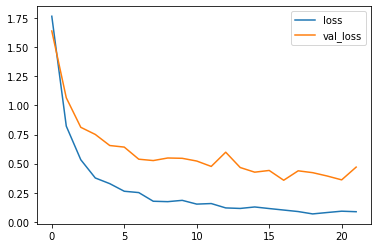

In [ ]:
# plotting loss and validation loss against number of epochs
metrics[['loss', 'val_loss']].plot()

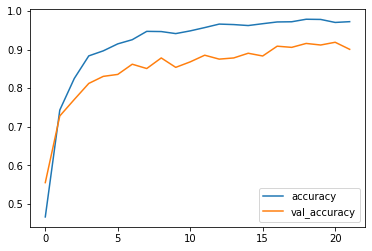

In [ ]:
# plotting accuracy and validation accuracy against number of epochs
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
test_image_gen[0][0].shape

(16, 96, 128, 1)

In [ ]:
model.evaluate(test_image_gen)

62/62 [==============================] - 7s 116ms/step - loss: 0.4415 - accuracy: 0.9046


[0.4414750933647156, 0.9045685529708862]

In [ ]:
# predicting loss and accuracy for the test images
preds = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
preds

array([[9.0166971e-12, 8.9348987e-08, 1.3622391e-09, ..., 1.3475338e-07,
        5.8063498e-11, 7.2282914e-05],
       [9.8267856e-07, 3.8569157e-12, 2.0962327e-12, ..., 5.4766281e-07,
        5.6576403e-11, 9.9999738e-01],
       [1.0864068e-11, 2.5346034e-09, 1.9728670e-09, ..., 9.0377910e-09,
        1.1002967e-05, 1.4322593e-04],
       ...,
       [9.8070014e-01, 7.8341939e-25, 4.0379220e-22, ..., 5.6422571e-12,
        2.1240069e-15, 4.8740945e-10],
       [1.2718227e-13, 5.3286724e-14, 2.4488132e-11, ..., 4.0910743e-12,
        7.7946578e-07, 3.4990795e-09],
       [2.1744039e-12, 2.3813084e-18, 2.5954236e-14, ..., 5.3156736e-13,
        5.9286858e-08, 1.2635807e-05]], dtype=float32)

In [ ]:
preds2 = model.predict_classes(test_image_gen[0])

In [ ]:
preds2

In [ ]:
test_image_gen.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'O': 13,
 'P': 14,
 'Q': 15,
 'R': 16,
 'S': 17,
 'T': 18,
 'U': 19,
 'V': 20,
 'W': 21,
 'X': 22,
 'Y': 23}

In [ ]:
test_image_gen[0][0][0].shape

(96, 128, 1)

In [ ]:
test_image_gen[0][0][0].min()

0.0

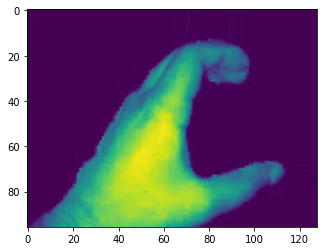

In [ ]:
plt.imshow(test_image_gen[0][0][8].reshape(96,128))

In [ ]:
test_image_gen.samples

985

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# saving the model for later use
# uncomment and rename it to the name you like after '/content/' with the extension '.h5'
#model.save('/content/SLR_bw_black4.h5')

In [ ]:
# loading the saved model for using later on without training again
#model = load_model('/content/SLR_bw_black4.h5')

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
#model = load_model('/content/SLR_bw_black1.h5')

In [ ]:
# Folder containing different test images
img_path = '/content/drive/My Drive/Test/C2.jpg'

In [ ]:
# Dictionary containing classes
classes = test_image_gen.class_indices

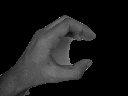

In [ ]:
# This script is from https://github.com/imRishabhGupta/Indian-Sign-Language-Recognition and modified slightly by Sujay P
# A modified version of this script was used to augment the entire dataset and convert every image to an image with a
# black background
# The following script converts the background of the test images to black! Works to some extent!
# No need of this script if you used a different datatset for training

import cv2
from google.colab.patches import cv2_imshow

frame = cv2.imread(img_path)
frame = cv2.resize(frame,(128,96))


converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#print(frame.shape)

lowerBoundary = np.array([0,40,30],dtype="uint8")
upperBoundary = np.array([43,255,254],dtype="uint8")

skinMask = cv2.inRange(converted, lowerBoundary, upperBoundary)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
skinMask = cv2.erode(skinMask, kernel, iterations = 2)
skinMask = cv2.dilate(skinMask, kernel, iterations = 2)

lowerBoundary = np.array([170,80,30],dtype="uint8")
upperBoundary = np.array([180,255,250],dtype="uint8")

skinMask2 = cv2.inRange(converted, lowerBoundary, upperBoundary)
skinMask = cv2.addWeighted(skinMask,0.5,skinMask2,0.5,0.0)
#cv2_imshow(skinMask)

skinMask = cv2.medianBlur(skinMask, 5)
skin = cv2.bitwise_and(frame, frame, mask = skinMask)
frame = cv2.addWeighted(frame,1.5,skin,-0.5,0)
skin = cv2.bitwise_and(frame, frame, mask = skinMask)
gray = cv2.cvtColor(skin, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray)

In [ ]:
# check the dimensions of the test image
# if you want to test on a single image file then open the side menu, press the upload button
# if the test image is of different dimension than your training image dimensions then use .reshape(dim1, dim2)
gray.shape

(96, 128)

In [ ]:
# Adding the 'number of examples' dimension and 'Color channel' dimension to the test image so as to match the dimensions
# of the training set image dimension
gray = np.expand_dims(gray, (0, 3))

In [ ]:
#frame = frame.reshape(1, 96, 128, 1)

In [ ]:
gray.shape

(1, 96, 128, 1)

In [ ]:
gray.max()

181

In [ ]:
gray.min()

0

In [ ]:
# Normalizing the pixel values of the test image to bring the range of every pixel in between 0 & 1
gray = gray/255

In [ ]:
gray.max()

0.7098039215686275

In [ ]:
gray.min()

0.0

In [ ]:
model.predict_classes(gray)

array([2])

In [ ]:
# predicting the class of the test image
predict = model.predict_classes(gray)

In [ ]:
# predicted class of the test image
list(classes.keys())[predict[0]]

'C'